<a href="https://colab.research.google.com/github/anabellatus/PCVK_Ganjil_2024/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NIM**			        : 2241720095

**Nama**			      : Ana Bellatus Mustaqfiro

**Kelas**			      : D4 TI - 3F

**No. Urut**		    : 04

**Mata Kuliah**		  : Pengolahan Citra dan Visi Komputer - Modul 11 (MetodeDeteksiObjek: TemplateMatching,Edge
Detection,CornerDetection,GridDetection,ContourDetection)

## Latihan Praktikum

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week11.ipynb”.

Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

**Object Detection**

Metode yang digunakan:
1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

### **Template Matching**

Menggunakan library openCV:

cv.matchTemplate(), dengan parameter:


*   Image: citra input
*   templ: template yang dicari, ukurannya tidak boleh lebih besar dari citra input
*   method: metode dari template matching

Jenis metode dari template matching di OpenCV:

1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED



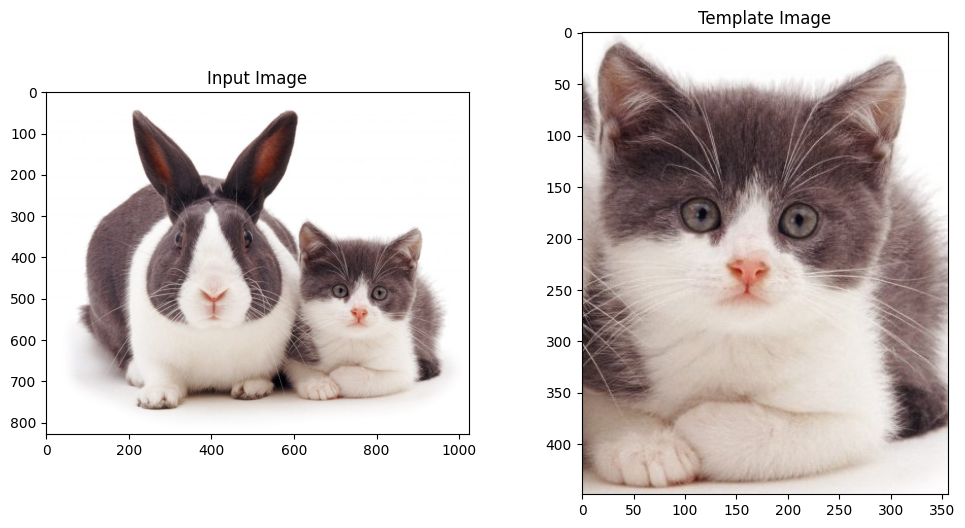

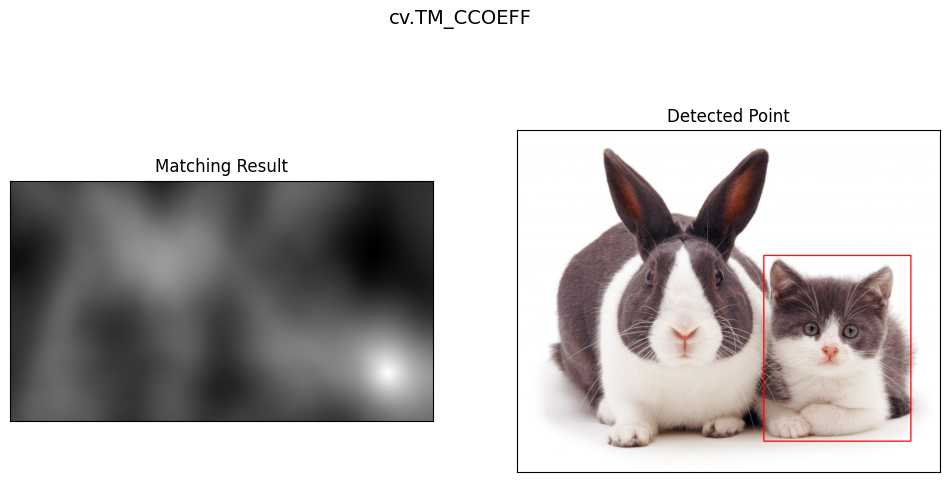

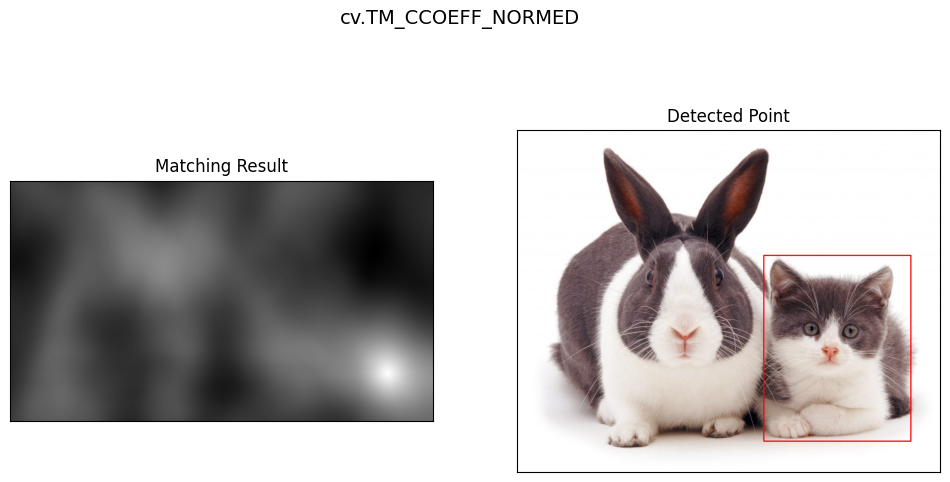

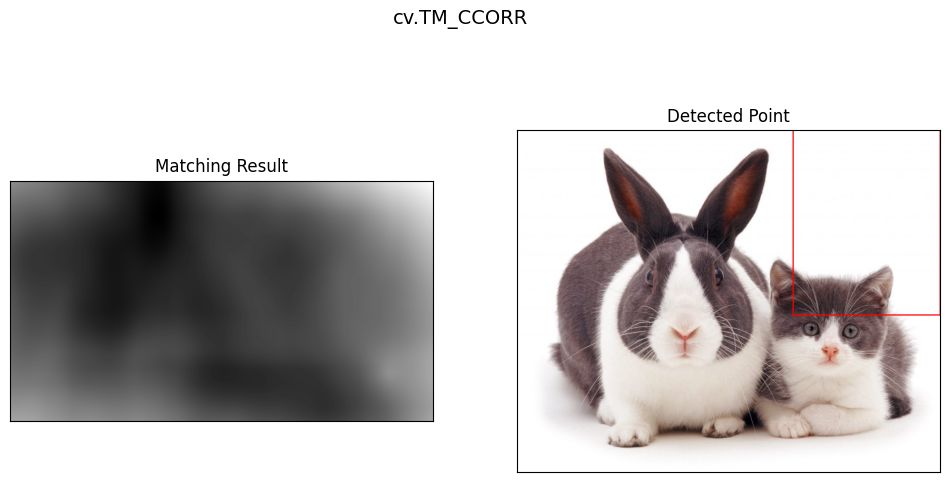

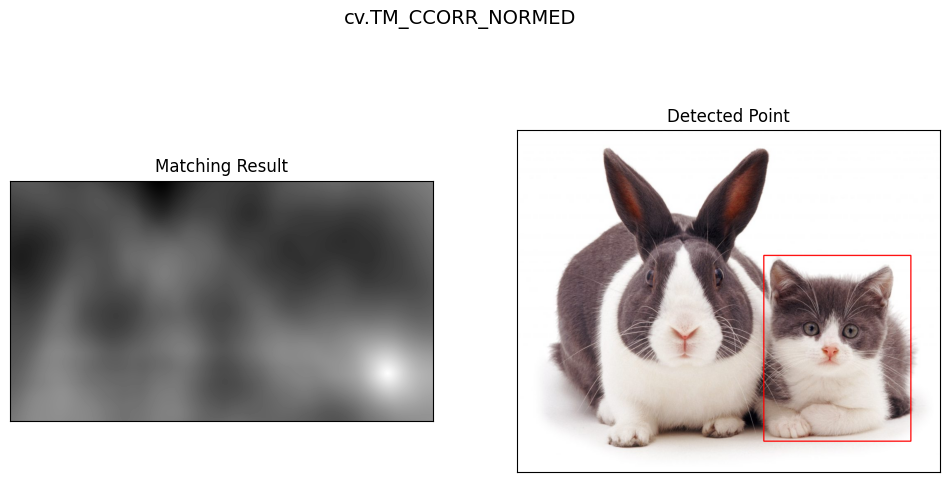

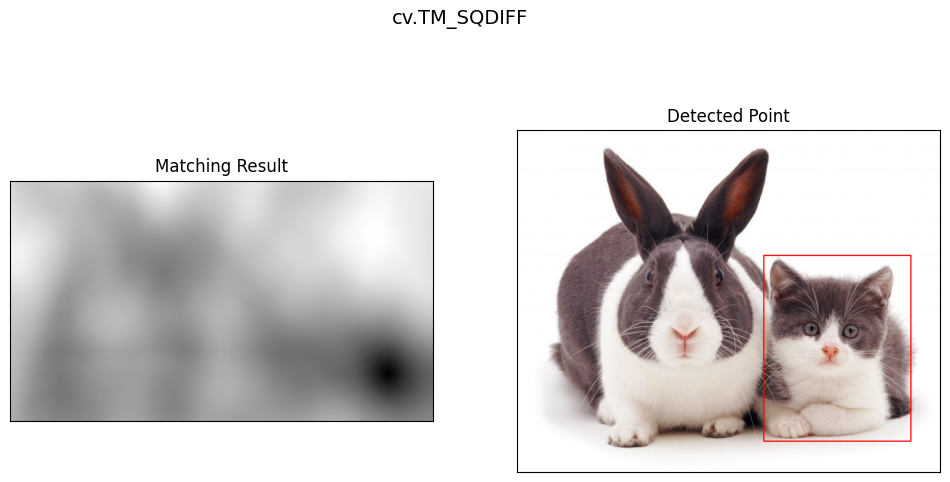

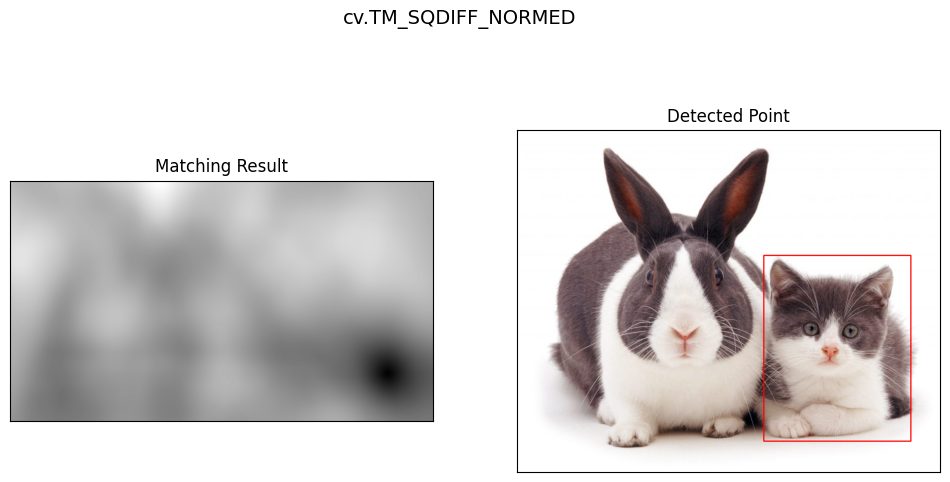

In [45]:
# Membaca citra input dan template
cat_input_image = cv2.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/cats_and_bunnies.jpg', cv2.IMREAD_COLOR)
cat_template_image = cv2.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/cat2_template.jpg', cv2.IMREAD_COLOR)

# Menampilkan citra input dan template
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cat_input_image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cat_template_image, cv2.COLOR_BGR2RGB))
plt.title('Template Image')
plt.show()

# Mengubah gambar menjadi grayscale
template_gray = cv2.cvtColor(cat_template_image, cv2.COLOR_BGR2GRAY)
input_gray = cv2.cvtColor(cat_input_image, cv2.COLOR_BGR2GRAY)

# Mendapatkan ukuran template
width, height = template_gray.shape[::-1]

# Daftar metode
methods = [
    ('TM_CCOEFF', cv2.TM_CCOEFF),
    ('TM_CCOEFF_NORMED', cv2.TM_CCOEFF_NORMED),
    ('TM_CCORR', cv2.TM_CCORR),
    ('TM_CCORR_NORMED', cv2.TM_CCORR_NORMED),
    ('TM_SQDIFF', cv2.TM_SQDIFF),
    ('TM_SQDIFF_NORMED', cv2.TM_SQDIFF_NORMED),
]

# Melakukan template matching untuk setiap metode
for method_name, method in methods:
    # Pencocokan template
    result = cv2.matchTemplate(input_gray, template_gray, method)

    # Mencari posisi terbaik untuk pencocokan
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Menentukan koordinat deteksi
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Hasil deteksi
    detected_image = cat_input_image.copy()
    cv2.rectangle(detected_image, top_left, bottom_right, (0, 0, 255), 2)

    # Menampilkan hasil
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'cv.{method_name}', fontsize=14)

    # Matching Result
    plt.subplot(1, 2, 1)
    plt.title('Matching Result')
    plt.imshow(result, cmap='gray')
    plt.xticks([]), plt.yticks([])

    # Detected Point
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Point')
    plt.xticks([]), plt.yticks([])

    plt.show()

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template

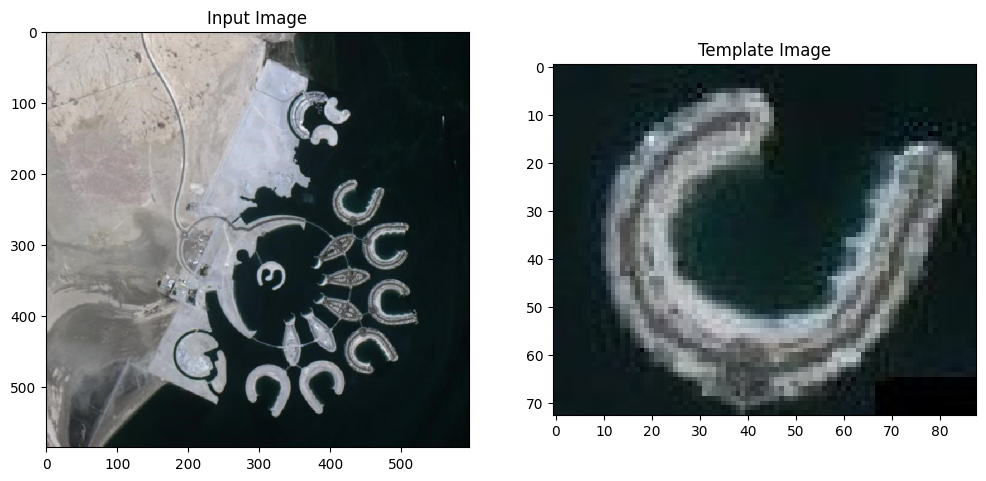

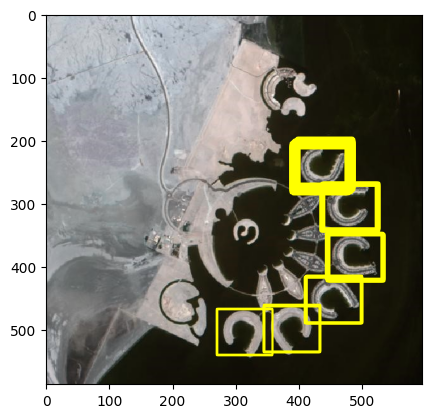

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import match_template
import matplotlib.patches as patches

# Membaca citra input dan template
bahrain_input_image = cv2.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/bahrain.jpg', cv2.IMREAD_COLOR)
bahrain_template_image = cv2.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/bahrain-template.jpg', cv2.IMREAD_COLOR)

# Menampilkan citra input dan template
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(bahrain_input_image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(bahrain_template_image, cv2.COLOR_BGR2RGB))
plt.title('Template Image')
plt.show()

# Mengubah gambar menjadi grayscale
input_gray = color.rgb2gray(bahrain_input_image)
template_gray = color.rgb2gray(bahrain_template_image)

# Melakukan template matching
result = match_template(input_gray, template_gray)

threshold = 0.46
match_locations = np.where(result >= threshold)

# Hasil
fig, ax = plt.subplots(1)
ax.imshow(bahrain_input_image, cmap='gray')

template_height, template_width = template_gray.shape
for y, x in zip(*match_locations):
    rect = patches.Rectangle((x, y), template_width, template_height, linewidth=1, edgecolor='yellow', facecolor='none')
    ax.add_patch(rect)

plt.show()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg

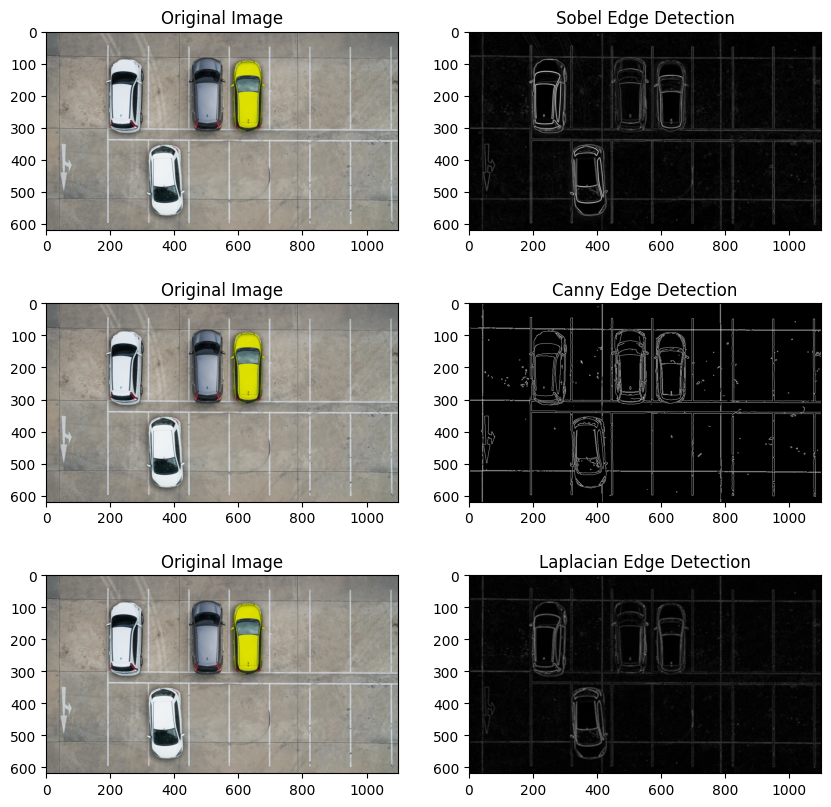

In [86]:
car_park_image = cv2.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/car-park.jpg', cv2.IMREAD_COLOR)
car_park_gray = cv2.cvtColor(car_park_image, cv2.COLOR_BGR2GRAY)

blurred_car_park = cv2.GaussianBlur(car_park_gray, (3, 3), 0)

# Sobel Edge Detection
sobel_x = cv2.Sobel(blurred_car_park, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred_car_park, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)

# Canny Edge Detection
canny_edge = cv2.Canny(car_park_image, 100, 200)

# Laplacian Edge Detection
laplacian_edge = cv2.Laplacian(blurred_car_park, cv2.CV_64F)
laplacian_edge = cv2.convertScaleAbs(laplacian_edge)

# Menampilkan Hasil
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

axs[0, 0].imshow(cv2.cvtColor(car_park_image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(sobel_edge, cmap='gray')
axs[0, 1].set_title('Sobel Edge Detection')

axs[1, 0].imshow(cv2.cvtColor(car_park_image, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Original Image')

axs[1, 1].imshow(canny_edge, cmap='gray')
axs[1, 1].set_title('Canny Edge Detection')

axs[2, 0].imshow(cv2.cvtColor(car_park_image, cv2.COLOR_BGR2RGB))
axs[2, 0].set_title('Original Image')

axs[2, 1].imshow(laplacian_edge, cmap='gray')
axs[2, 1].set_title('Laplacian Edge Detection')

plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg.

In [98]:
chess_board_image = cv2.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/chess-board.jpg')
chess_board_gray = cv2.cvtColor(chess_board_image, cv2.COLOR_BGR2GRAY)
chess_board_gray = np.float32(chess_board_gray)

a. Harris Corner Detection

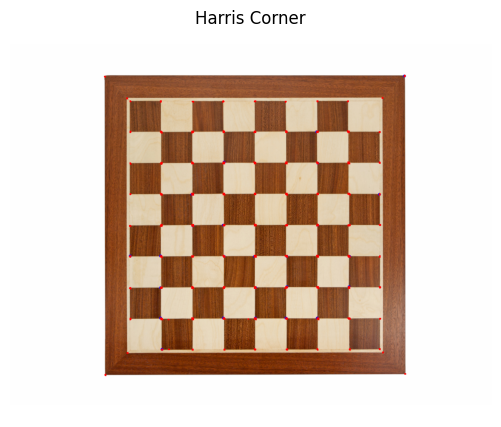

In [104]:
corner_harris = cv2.cornerHarris(chess_board_gray, 2, 3, 0.04)
corner_harris = cv2.dilate(corner_harris, None)
chess_board_image[corner_harris > 0.01 * corner_harris.max()] = [0, 0, 255]

# Menampilkan Hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Harris Corner')
plt.axis("off")
plt.imshow(cv2.cvtColor(chess_board_image, cv2.COLOR_BGR2RGB))

b. Shi-Tomasi Detection

In [102]:
chess_board_image = cv2.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/chess-board.jpg')
chess_board_gray = cv2.cvtColor(chess_board_image, cv2.COLOR_BGR2GRAY)
chess_board_gray = np.float32(chess_board_gray)

<ipython-input-103-d249a029ca1b>:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  shi_tomasi = np.int0(shi_tomasi)


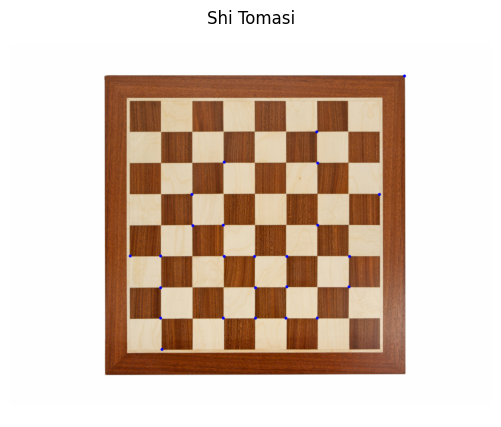

In [103]:
shi_tomasi = cv2.goodFeaturesToTrack(chess_board_gray, 25, 0.01, 10)
shi_tomasi = np.int0(shi_tomasi)
for i in shi_tomasi:
    x, y = i.ravel()
    cv2.circle(chess_board_image, (x, y), 3, 255, -1)

# Menampilkan Hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Shi Tomasi')
plt.axis("off")
plt.imshow(cv2.cvtColor(chess_board_image, cv2.COLOR_BGR2RGB))

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori

Number of Hough lines: 33
Number of filtered lines: 20


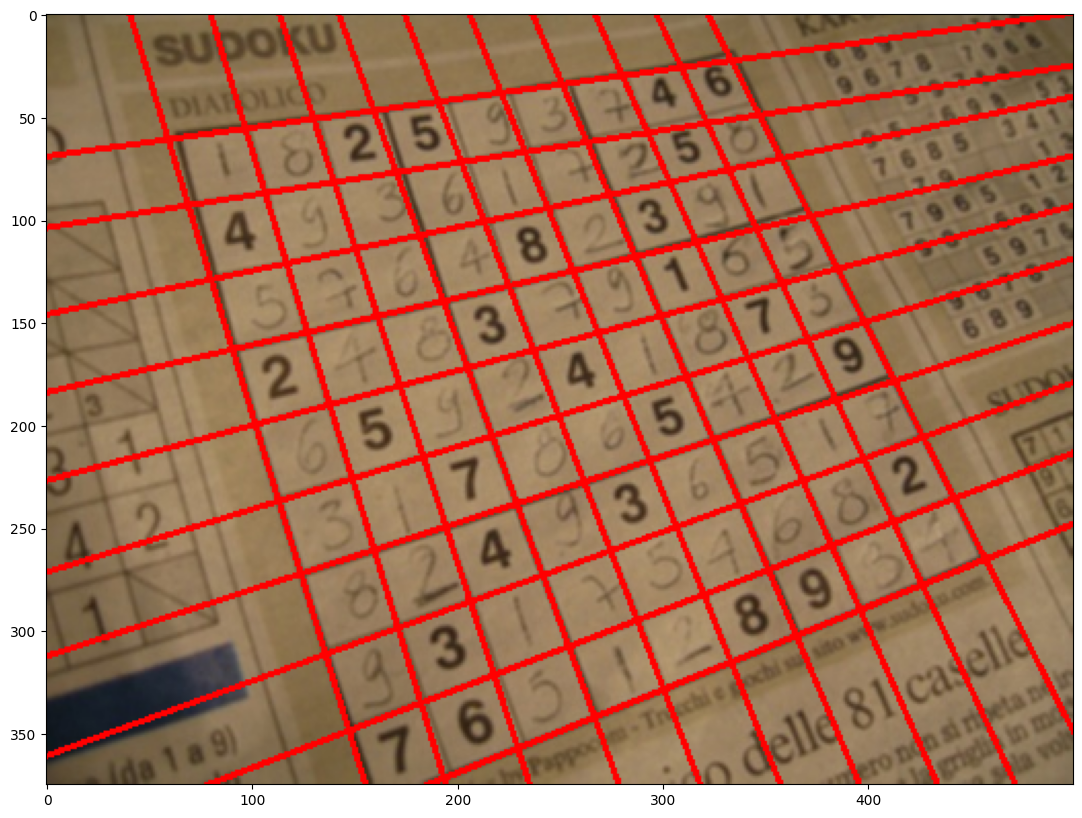

In [109]:
sudoku_image = cv2.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/sudoku.jpg')
sudoku_gray = cv2.cvtColor(sudoku_image, cv2.COLOR_BGR2GRAY)

# Canny edge detection
edges = cv2.Canny(sudoku_gray, 90, 150, apertureSize=3)

# Dilasi and Erosi untuk mempertajam garis tepian
kernel = np.ones((3, 3), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)

kernel = np.ones((5, 5), np.uint8)
edges = cv2.erode(edges, kernel, iterations=1)

# Hough Line Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)

# Check if any lines were detected
if lines is None:
    print('No lines were found')
else:
    # Set filter flag to True to enable line filtering
    filter = True
    if filter:
        rho_threshold = 15
        theta_threshold = 0.1

        # Group similar lines
        similar_lines = {i: [] for i in range(len(lines))}
        for i in range(len(lines)):
            for j in range(i + 1, len(lines)):
                rho_i, theta_i = lines[i][0]
                rho_j, theta_j = lines[j][0]
                if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                    similar_lines[i].append(j)

        # Sort lines based on similarity count
        indices = list(range(len(lines)))
        indices.sort(key=lambda x: len(similar_lines[x]), reverse=True)

        # Filter out duplicate or similar lines
        line_flags = [True] * len(lines)
        for i in range(len(lines) - 1):
            if not line_flags[indices[i]]:
                continue
            for j in range(i + 1, len(lines)):
                if not line_flags[indices[j]]:
                    continue
                rho_i, theta_i = lines[indices[i]][0]
                rho_j, theta_j = lines[indices[j]][0]
                if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                    line_flags[indices[j]] = False

        # Filtered lines based on the flags
        filtered_lines = [lines[i] for i in range(len(lines)) if line_flags[i]]
        print('Number of Hough lines:', len(lines))
        print('Number of filtered lines:', len(filtered_lines))
    else:
        filtered_lines = lines

    # Draw the detected lines on the image
    for line in filtered_lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv2.line(sudoku_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Display the result
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(sudoku_image, cv2.COLOR_BGR2RGB))
    plt.show()

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

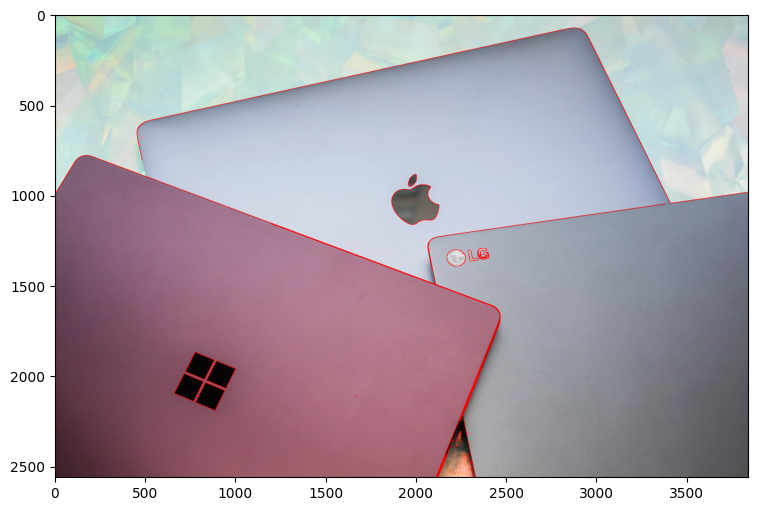

In [110]:
laptop_image = cv2.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/laptop.jpg')

# Mengubah gambar menjadi grayscale
laptop_gray = cv2.cvtColor(laptop_image, cv2.COLOR_BGR2GRAY)

# Menghilangkan noise dengan Gaussian blur
blurred_laptop = cv2.GaussianBlur(laptop_gray, (5, 5), 0)

# Canny edge detection
edges = cv2.Canny(blurred_laptop, 50, 150)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(laptop_image, contours, -1, (0, 0, 255), 2)

# Menampilkan Hasil
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(laptop_image, cv2.COLOR_BGR2RGB))
plt.show()

## **E. Pengayaan Materi KTP**

1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

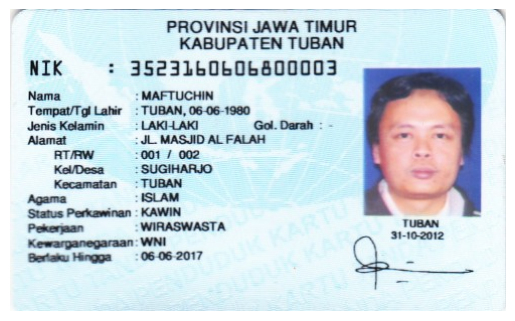

In [157]:
ktp_m = cv2.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/Week11/ktp3.png')
original_ktp = cv2.cvtColor(ktp_m, cv2.COLOR_BGR2RGB)
plt.imshow(original_ktp)
plt.axis('off')
plt.show()

2.  Muat 2 library berikut sebagai tahapan persiapan

In [128]:
import cv2
import os
from google.colab.patches import cv2_imshow

3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut

In [125]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/UniLife/Semester5/PCVK/Week11/"

# Looping untuk setiap file di dalam direktori
for name_file in sorted(os.listdir(path_plate)):
    # Periksa jika file adalah gambar yang diinginkan
    if name_file == 'ktp3.png':
        # Baca gambar dari file
        src = cv2.imread(os.path.join(path_plate, name_file))
        if src is None:
            continue

        # Buat salinan gambar untuk di-blur
        blurred = src.copy()

        # Konversi gambar ke grayscale
        gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

        # Filtering
        for i in range(10):
          blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi

In [ ]:
# Filtering
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra (thresholding)

In [126]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

168.0 (300, 493)


**Hasil**

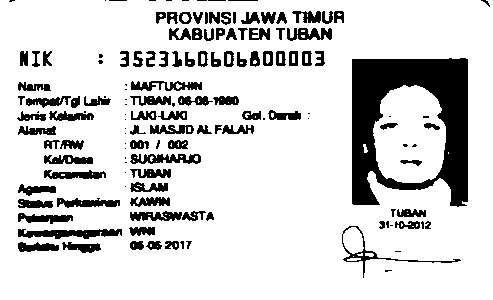

In [144]:
cv2_imshow(bw)

6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

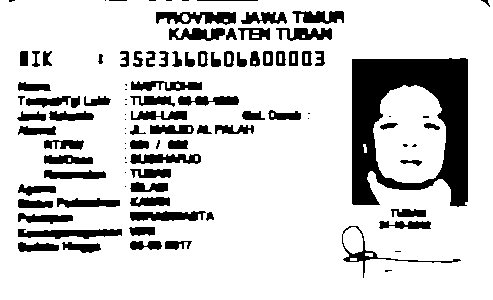

In [145]:
# Melakukan Morfologi Opening
kernel = np.ones((3, 3), np.uint8)
morf = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel, iterations=1)

cv2_imshow(morf)

7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek. Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik (karena hasil akuisisi setiap citra dapat berbeda).

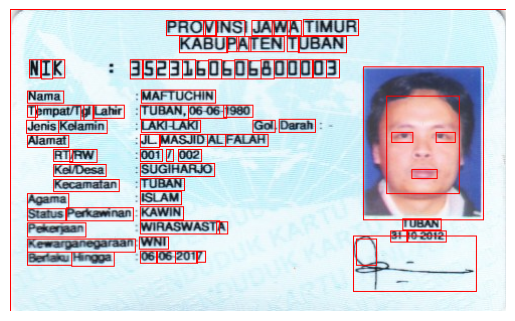

In [158]:
# Mengurangi noise dengan Gaussian blur
blurred_image = cv2.GaussianBlur(ktp_m, (5, 5), 0.5)

# Mengubah gambar menjadi grayscale
gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)

# Binerisasi dengan thresholding Otsu
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Melakukan morfologi erosi
eroded_image = cv2.erode(binary_image, cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2)))

# Ekstraksi kontur
contours, _ = cv2.findContours(eroded_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h  # Menghitung rasio lebar dan tinggi
    if h >= 40 and w >= 10 and aspect_ratio <= 1:
        cv2.rectangle(ktp_m, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 8 and w >= 8 and aspect_ratio <= 10:
        cv2.rectangle(ktp_m, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 7 and aspect_ratio <= 8:
        cv2.rectangle(ktp_m, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

ktp_rgb_image = cv2.cvtColor(ktp_m, cv2.COLOR_BGR2RGB)

# Menampilkan Hasil
plt.imshow(ktp_rgb_image)
plt.axis('off')
plt.show()

## **F. Tugas Praktikum**

Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah.

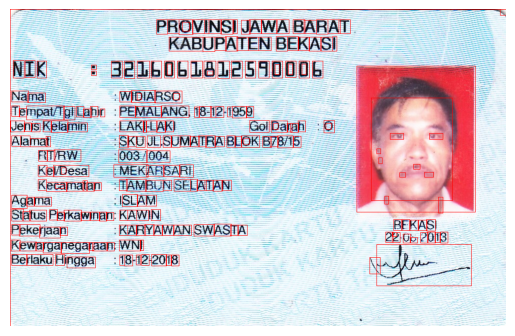

In [159]:
ktp_w = cv2.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/KTP_More/KTP_More/ktp6.png')

# Mengurangi noise dengan Gaussian blur
blurred_image_w = cv2.GaussianBlur(ktp_w, (5, 5), 0.5)

# Mengubah gambar menjadi grayscale
gray_image_w = cv2.cvtColor(blurred_image_w, cv2.COLOR_BGR2GRAY)

# Binerisasi dengan thresholding Otsu
_, binary_image_w = cv2.threshold(gray_image_w, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Melakukan morfologi erosi
eroded_image_w = cv2.erode(binary_image_w, cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2)))

# Ekstraksi kontur
contours, _ = cv2.findContours(eroded_image_w, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h  # Menghitung rasio lebar dan tinggi
    if h >= 40 and w >= 10 and aspect_ratio <= 1:
        cv2.rectangle(ktp_w, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 8 and w >= 8 and aspect_ratio <= 10:
        cv2.rectangle(ktp_w, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 7 and aspect_ratio <= 8:
        cv2.rectangle(ktp_w, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

ktp_rgb_image_w = cv2.cvtColor(ktp_w, cv2.COLOR_BGR2RGB)

# Menampilkan Hasil
plt.imshow(ktp_rgb_image_w)
plt.axis('off')
plt.show()

**Link** Repo
[Week 11](https://github.com/anabellatus/PCVK_Ganjil_2024/blob/main/Week11.ipynb)